# Mouse Functional Connectivity Analysis
The purpose of this script is to analyze neuropixel data taken from mice. \
The dataset can be found at https://dandiarchive.org/dandiset/000022/draft. However, it was originally distributed by Allen Brain Atlas.\
Information regarding that study can be found at https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels.

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open NWB file in read-only mode
nwb_file = h5py.File('sub-744912845_ses-766640955.nwb', 'r')

In [2]:
# Print the names of all top-level groups in the file
print("Top-level groups:")
for group_name in nwb_file.keys():
     print(group_name)

# Print the names of all datasets in the file
print("\nDatasets:")
def printname(name):
       print(name)
nwb_file.visit(printname)

Top-level groups:
acquisition
analysis
file_create_date
general
identifier
intervals
processing
session_description
session_start_time
specifications
stimulus
timestamps_reference_time
units

Datasets:
acquisition
acquisition/raw_running_wheel_rotation
acquisition/raw_running_wheel_rotation/data
acquisition/raw_running_wheel_rotation/timestamps
acquisition/running_wheel_signal_voltage
acquisition/running_wheel_signal_voltage/data
acquisition/running_wheel_supply_voltage
acquisition/running_wheel_supply_voltage/data
analysis
file_create_date
general
general/devices
general/devices/probeA
general/devices/probeB
general/devices/probeC
general/devices/probeD
general/devices/probeE
general/devices/probeF
general/extracellular_ephys
general/extracellular_ephys/electrodes
general/extracellular_ephys/electrodes/filtering
general/extracellular_ephys/electrodes/group
general/extracellular_ephys/electrodes/group_name
general/extracellular_ephys/electrodes/id
general/extracellular_ephys/electrodes

In [8]:
# Access the spike train data for a specific unit
# I believe it is defaulting to the first recorded unit.
# Or this is all units together.
spike_times = nwb_file['units']['spike_times'][:1000].copy()
spike_amplitudes = nwb_file['units']['spike_amplitudes'][:].copy()

# Print session description, start time, and specifications
session_description = nwb_file['session_description'][()]
session_start_time = nwb_file['session_start_time'][()]
specifications = list(nwb_file['specifications'].keys())
    
print(f"Session description: {session_description}")
print(f"Session start time: {session_start_time}")
print("Specifications:")
for spec in specifications:
    print(spec)
    
# Print some information about the spike train data
print(f"\nSpike train data for unit {unit_id}:")
print(f"Number of spikes: {len(spike_times)}")
print(f"Spike times: {spike_times}")
print(f"Spike amplitudes: {spike_amplitudes}")
    
print("Shape of Spike Times")
print(np.shape(spike_times))

Session description: b'Data and metadata for an Ecephys session'
Session start time: b'2019-01-02T15:45:39-08:00'
Specifications:
core
hdmf-common
ndx-aibs-ecephys

Spike train data for unit 1:
Number of spikes: 1000
Spike times: [  3.89673114   4.0500313    4.17223143   4.33999827   4.38316498
   4.83536546   4.96676559   4.98156561   5.20916585   5.31376596
   5.53163285   5.59693292   5.73733307   6.35753372   6.4684005
   7.20820128   7.91686869  10.12897101  11.56540586  14.04534179
  15.26294307  16.69584458  17.34341192  17.59701219  18.66721331
  18.79348011  18.88518021  19.09851377  19.44168079  19.57238093
  20.09404814  20.29591502  20.35218175  20.43791517  20.5269486
  20.67988209  20.93948237  20.9453157   20.96954906  20.98974908
  21.11201588  21.17451595  22.31391714  22.47068397  22.50228401
  22.51165068  22.60935079  23.12168466  23.55718511  23.56595179
  24.38038598  24.45671939  24.76718638  24.83278645  24.85278647
  25.06555336  25.53825386  25.68952069  25.71

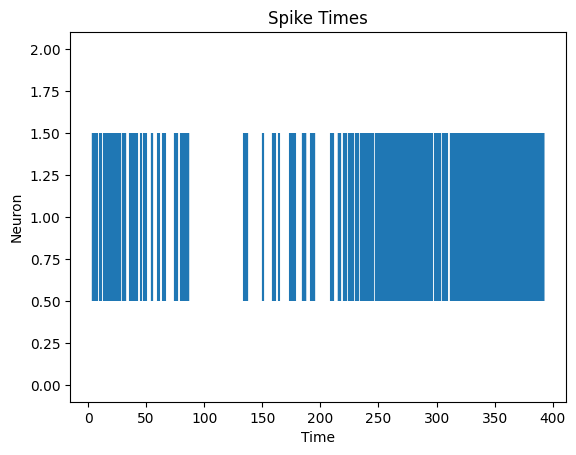

In [10]:
# Plot the spike times
plt.eventplot(spike_times)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Neuron')
plt.title('Spike Times')
plt.show()

In [14]:
import pandas as pd
spike_times = pd.DataFrame(spike_times)
spike_times.to_csv('Sample_Spike_Times.csv')

In [15]:
# Close the file.
nwb_file.close()